## Orthogonalization

Some of the most important applications of inner products involve finding and using sets of vectors that are mutually orthogonal.  A set of nonzero vectors $\{U_1, U_2, U_3 ... U_n\}$ is **mutually orthogonal** if $U_i\cdot U_j = 0$ whenever $i \neq j$.  This simply means that every vector in the set is orthogonal to every other vector in the set.  If a set of vectors is mutually orthogonal *and* every vector in the set is a *unit vector*, we say the set is **orthonormal**.  In other words, every vector in an orthonormal set has magnitude one, and is orthogonal to every other vector in the set.  

Orthonormal sets must be linearly independent, so it makes sense to think of them as a basis for some vector subspace.  Any collection of vectors from the standard bases of $\mathbb{R}^n$ are orthonormal sets.  For example, the set of vectors $\{E_1, E_4, E_5\}$ from the standard basis of $\mathbb{R}^5$ forms a orthonormal basis for a subspace of $\mathbb{R}^5$.


$$
\begin{equation}
E_1 = \left[ \begin{array}{r} 1\\0\\0\\0\\0 \end{array}\right] \hspace{0.7cm} 
E_4 = \left[ \begin{array}{r} 0\\0\\0\\1\\0 \end{array}\right] \hspace{0.7cm}
E_5 = \left[ \begin{array}{r} 0\\0\\0\\0\\1 \end{array}\right] \hspace{0.7cm}
\end{equation}
$$

In this section we will focus on a process called orthogonalization.  Given a set of linearly independent vectors  $\{V_1, V_2, V_3 ... V_n\}$, we wish to find an orthonormal set of vectors  $\{U_1, U_2, U_3 ... U_n\}$ such that the span of  $\{U_1, U_2, U_3 ... U_n\}$ is the same as the span of  $\{V_1, V_2, V_3 ... V_n\}$.  In other words, we want both sets to be bases for the same subspace.

One of the primary advantages of using orthonormal bases is that the calculation of [coordinate vectors](Bases.ipynb) is greatly simplified.  Recall that if we have a typical basis $\beta = \{V_1, V_2, V_3 ... V_n\}$ for a subspace $\mathcal{V}$, and a vector $X$ in $\mathcal{V}$, the coordinates with respect to $\beta$ are the values of $c_1$, $c_2$, ... ,$c_n$ such that
$X = c_1V_1 + c_2V_2 + ... c_nV_n$.  This requires that we solve the linear system $A[X]_{\beta}=X$, where $A$ is the matrix that has the basis vectors as its columns, and $[X]_\beta$ is the coordinate vector.  If instead we have an orthonormal basis $\alpha = \{U_1, U_2, U_3 ... U_n\}$ for $\mathcal{V}$, there is a convenient shortcut to solving $X = b_1U_1 + b_2U_2 + ... b_nU_n$.  Let's observe the result of taking the dot product of both sides of this equation with $U_k$.

$$
\begin{eqnarray}
X\cdot U_k & = & (b_1U_1 + b_2U_2 + ... b_nU_n)\cdot U_k \\
 & = & b_1(U_1\cdot U_k) + b_2(U_2\cdot U_k) + ... b_n(U_n\cdot U_k) \\
 & = & b_k 
\end{eqnarray}
$$

All of the products $U_i\cdot U_k$ are zero except for $U_k\cdot U_k$, which is one.  This means that instead of solving a system to find the coordinates, we can compute each $b_k$ directly, as the dot product $X\cdot U_k$. 

### Projecting vectors onto vectors

An important step in orthogonalization involves decomposing a vector $B$ into orthogonal components based on the direction of another vector $V$.  Specifically, we want to determine two vectors, $\hat{B}$ and $E$, such that $\hat{B}$ is in the same direction as $V$, $E$ is orthogonal to $V$, and $B = \hat{B} + E$.

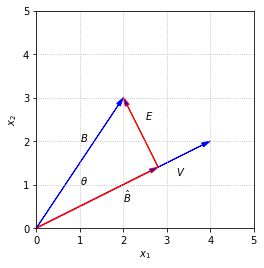

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,3,fc='b',ec='b',**options)
ax.arrow(0,0,4,2,fc='b',ec='b',**options)
ax.arrow(0,0,2.8,1.4,fc='b',ec='r',**options)
ax.arrow(2.8,1.4,-0.8,1.6,fc='b',ec='r',**options)

ax.text(1,2,'$B$')
ax.text(3.2,1.2,'$V$')
ax.text(2,0.6,'$\hat{B}$')
ax.text(2.5,2.5,'$E$')
ax.text(1,1,'$\\theta$')


ax.set_xlim(0,5)
ax.set_xlabel('$x_1$')
ax.set_ylim(0,5)
ax.set_ylabel('$x_2$')
ax.set_aspect('equal')

ax.grid(True,ls=':')

The vector $\hat{B}$ is said to be the **projection** of $B$ in the direction of $V$.

To find the magnitude of $\hat{B}$, we can use the definition of cosine to write $||\hat{B}|| = ||B||\cos{\theta}$.  We also know that $\cos{\theta}$ can be determined using the dot product.


$$
\begin{equation}
\cos{\theta} = \frac{B\cdot V}{||B||||V||}
\end{equation}
$$

Combining these facts gives us $||\hat{B}||$.

$$
\begin{equation}
||\hat{B}|| = \frac{B\cdot V}{||V||} 
\end{equation}
$$

We can now construct $\hat{B}$ by multiplying $||\hat{B}||$ by a unit vector in the direction of $V$


$$
\begin{equation}
\hat{B} = \frac{B\cdot V}{||V||}\left(\frac{V}{||V||}  \right)  
\end{equation}
$$

Finally, we can give a tidy formula by writing $||V||^2$ using the dot product.


$$
\begin{equation}
\hat{B} = \left(\frac{B\cdot V}{V\cdot V}\right) V 
\end{equation}
$$

In [2]:
import numpy as np
from laguide import DotProduct
from laguide import Magnitude

B = np.array([[2],[3]])
V = np.array([[4],[2]])

k = DotProduct(B,V)/DotProduct(V,V)

B_hat = k*V

print(B_hat)

[[2.8]
 [1.4]]


The easiest way to calculate $E$ is to first find $\hat{B}$, then set $E = B - \hat{B}$.

In [3]:
E = B - B_hat
print(E)

[[-0.8]
 [ 1.6]]


If the calculations are correct, we should see that $\hat{B}$ and $E$ are orthogonal.

In [4]:
print(DotProduct(B_hat,E))

4.440892098500626e-16


We see in fact that the computed value of $\hat{B}\cdot E$ is not *exactly* zero due to the imprecision of the machine arithmetic.  This is very similar to some of the results we observed when performing elimination numerically, and we must keep in mind the potential for such errors.  

We also note that the formula derived here for $\hat{B}$ works for vectors of any dimension.  If $B$ and $V$ are vectors in $\mathbb{R}^n$, they still occupy a common plane, and the picture looks just the same as the one above regardless of the fact that the plane sits in a higher dimensional space.

### Gram-Schmidt algorithm

Given a set of linearly independent vectors  $\{V_1, V_2, V_3 ... V_n\}$, the **Gram-Schmidt algorithm** produces an orthonormal set of vectors $\{U_1, U_2, U_3 ... U_n\}$ such that the span of  $\{U_1, U_2, U_3 ... U_n\}$ is the same as the span of  $\{V_1, V_2, V_3 ... V_n\}$.  The idea is to build up the set of $U$ vectors one at a time, while ensuring that each new vector $U_i$ that is added is orthogonal to all vectors already in the set.  These vectors are constructed by selecting a vector from the $V$ set, and subtracting the components that are in the directions of any vectors already in the $U$ set.  The $U$ vectors can be scaled to unit length as part of the process, or they can all be scaled at the end.

We write the algorithm in steps before providing an example.

1. $V_1$ is scaled to unit length and becomes $U_1$.
2. The projection of $V_2$ in the direction of $U_1$ is subtracted from $V_2$.  The resulting vector is scaled to unit length and becomes $U_2$.
3. The projections of $V_3$ in the directions of $U_1$ and $U_2$ are subtracted from $V_3$.  The resulting vector is scaled to unit length and becomes $U_3$.  
4. Continue applying a similar procedure for all $n$ vectors.  In general, the projections of $V_k$ in the directions of $U_1$, $U_2$, ...$U_{k-1}$ are subtracted from $V_k$ and the resulting vector is scaled to unit length to become $U_k$.  


### Example 1:  Applying the Gram-Schmidt algorithm

As a first example, we take three vectors from $\mathbb{R}^3$ as the starting set, and use Python to carry out the calculations.

$$
\begin{equation}
V_1 = \left[ \begin{array}{r} 1 \\ 2 \\ 0 \end{array}\right] \hspace{0.7cm} 
V_2 = \left[ \begin{array}{r} 1 \\ 1 \\ 1 \end{array}\right] \hspace{0.7cm}
V_3 = \left[ \begin{array}{r} 3 \\ 0 \\ 1 \end{array}\right] \hspace{0.7cm}
\end{equation}
$$

The first vector, $V_1$ is scaled to unit legth to become $U_1$

In [5]:
V_1 = np.array([[1],[2],[0]])
V_2 = np.array([[1],[1],[1]])
V_3 = np.array([[3],[0],[1]])

U_1 = V_1/Magnitude(V_1)
print(U_1)

[[0.4472136 ]
 [0.89442719]
 [0.        ]]


To build $U_2$, we first subtract from $V_2$ the projection of $V_2$ in the direction of $U_1$.  The resulting vector is then scaled to unit length.

In [6]:
W_2 = V_2 - (DotProduct(V_2,U_1))*U_1
U_2 = W_2/Magnitude(W_2)
print(U_2)

[[ 0.36514837]
 [-0.18257419]
 [ 0.91287093]]


Here we labeled the intermediate result as $W_2$ in order to break the computation into shorter steps.

In the final step, we subtract from $V_3$ the projections of $V_3$ in the directions of $U_1$ and $U_2$, and then scale the result.

In [7]:
W_3 = V_3 - (DotProduct(V_3,U_1))*U_1 - (DotProduct(V_3,U_2))*U_2
U_3 = W_3/Magnitude(W_3)
print(U_3)

[[ 0.81649658]
 [-0.40824829]
 [-0.40824829]]


We can check now that the $U$ vectors are mutually orthogonal.

In [8]:
print(DotProduct(U_1,U_2))
print(DotProduct(U_1,U_3))
print(DotProduct(U_2,U_3))

5.551115123125783e-17
0.0
-5.551115123125783e-17


After completing this example, we write down the steps of the process for a set of $n$ vectors.  For each $i = 1, 2, ... n$, we set:

>$W_i = V_i - (V_i \cdot U_1)U_1 - (V_i\cdot U_2)U_2 ... - (V_i\cdot U_{i-1})U_{i-1}$  
>$U_i = W_i/||W_i||$  

It is important to notice here that in general $U_i$ is a linear combination of $\{V_1, V_2, ..., V_{i}\}$.  This means that in addition to the span of $\{U_1, U_2, U_3 ... U_n\}$ being the same as the span of $\{V_1, V_2, V_3 ..., V_n\}$, it is also true that the span of $\{U_1, U_2, ..., U_i\}$ is the same as the span of $\{V_1, V_2, ..., V_i\}$ for every $i$.  This has important implications in the next section. 

### Orthogonal matrices

Another way we could check that the set of vectors $\{U_1, U_2, U_3\}$ is orthonormal is to assemble a matrix with these vectors as the columns and take advantage of the connection between matrix multiplications and dot products.  Suppose that $Q$ is the matrix with $U_1$, $U_2$, and $U_3$ as its columns.  If we compute the matrix product $Q^TQ$, the entries will be the dot products between the rows of $Q^T$ and columns of $Q$, both of which are the set of $U$ vectors.

In [10]:
Q = np.hstack((U_1,U_2,U_3))
print(Q,'\n')

I = Q.transpose()@Q
print(I,'\n')

## Round the entries to 8 decimal places
print(np.round(I,8))

[[ 0.4472136   0.36514837  0.81649658]
 [ 0.89442719 -0.18257419 -0.40824829]
 [ 0.          0.91287093 -0.40824829]] 

[[ 1.00000000e+00  5.21392112e-17 -1.14826894e-17]
 [ 5.21392112e-17  1.00000000e+00 -6.57870242e-17]
 [-1.14826894e-17 -6.57870242e-17  1.00000000e+00]] 

[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]


We see that $U_i\cdot U_j$ is 0 if $i\neq j$ and 1 if $i=j$, which means that $Q^TQ$ is the identity matrix $I$.  (*Note the use of $\texttt{round}$ for display purposes.*)

The matrix $Q$ is called an **orthogonal matrix**, which means that its columns form a set of orthonormal vectors.  An immediate result of this definition is that if $Q$ is an orthogonal matrix, then $Q^TQ = I$.  In the special case that $Q$ is square, this equation implies that $Q^T = Q^{-1}$.

### Exercises

**Exercise 1:**  Explain why a set of nonzero mutually orthogonal vectors must be linearly independent.  

**Exercise 2:**  Derive the formula for the projection of $B$ onto $V$ in another way that doesn't involve $\cos{\theta}$.  Let $\hat{B} = kV$, where $k$ is an unknown scalar.  Now use $\hat{B}\cdot E$ to determine $k$ directly.

**Exercise 3:** The set $\beta = \{U_1, U_2, U_3\}$ is an orthonormal basis for $\mathbb{R}^3$.

$$
\begin{equation}
U_1 = \frac{1}{\sqrt{6}}\left[ \begin{array}{r} 2 \\ 1 \\ 1 \end{array}\right] \hspace{0.7cm} 
U_2 = \frac{1}{\sqrt{2}}\left[ \begin{array}{r} 0 \\ -1 \\ 1 \end{array}\right] \hspace{0.7cm}
U_3 = \frac{1}{\sqrt{3}}\left[ \begin{array}{r} -1 \\ 1 \\ 1 \end{array}\right] \hspace{0.7cm}
\end{equation}
$$

($a$) Define $Q$ as the matrix with columns $U_1$, $U_2$, and $U_3$.  Verify that $Q^TQ=I$.

In [ ]:
## Code solution here.

($b$) Let $X$ be the following vector, and compute $[X]_{\beta}$ by solving $Q[X]
_{\beta}= X$.

$$
\begin{equation}
X = \left[ \begin{array}{r} 3 \\ 1 \\ -4 \end{array}\right] 
\end{equation}
$$

In [ ]:
## Code solution here.

**Exercise 4:** Find a vector that is orthogonal to the column space of the matrix $A$.

$$
\begin{equation}
A = \left[ \begin{array}{rr} 1 & 2\\ 2 & 0 \\ 3 & 1\end{array}\right] 
\end{equation}
$$

In [18]:
## Code solution here

**Exercise 5:** Let $\mathcal{U}$ be the subspace spanned by $\{V_1,V_2\}$. Apply the Gram-Schimdt orthogonalization on the basis $\{V_1,V_2\}$ to produce an orthonormal basis $\{U_1,U_2\}$ for $\mathcal{U}$.  Verify that $\{U_1,U_2\}$ is an orthonormal basis with a computation.

$$
\begin{equation}
V_1 = \left[ \begin{array}{r} 1 \\ 1 \\ 2 \end{array}\right] \hspace{1cm}
V_2 = \left[ \begin{array}{r} 2 \\ 1 \\ 3 \end{array}\right] 
\end{equation}
$$

In [1]:
## Code solution here

**Exercise 6:** Let $\mathcal{U}$ be the subspace spanned by $\{X_1,X_2\}$. Apply the Gram-Schimdt orthogonalization on the basis $\{X_1,X_2\}$ to produce an orthonormal basis $\{U_1,U_2\}$ for $\mathcal{U}$.  Verify that $\{U_1,U_2\}$ is an orthonormal basis with a computation.

$$
\begin{equation}
X_1 = \left[ \begin{array}{r} 1 \\ 0 \\ 2 \\ 2 \end{array}\right] \hspace{0.7cm} 
X_2 = \left[ \begin{array}{r} -2 \\ 1 \\ 0 \\ -1 \end{array}\right]
\end{equation}
$$

In [ ]:
## Code solution here.

**Exercise 7:** Let $V$ be a vector in $\mathbb{R}^4$. Explain why the set of vectors orthogonal to $V$ is a subspace of $\mathbb{R}^4$.

**Exercise 8:** Given vectors $V$ and $W$, find vectors $X$ and $Y$ such that $X$ is the projection of $V$ in the direction of $W$ and $V = X + Y$ .Verify your answer.


$$
\begin{equation}
V = \left[ \begin{array}{r} 
9\\ 5 \\ 0 \end{array}\right] \hspace{1cm}
W = \left[ \begin{array}{r} 3 \\ 0 \\ 3 \end{array}\right] 
\end{equation}
$$

In [21]:
## Code solution here

**Exercise 9:** Let $U$ be a vector space spanned by the columns of $A$. Find an orthonormal basis for $U$ to generate an orthogonal matrix $Q$. Verify that $Q^TQ = I$ where $I$ is the identity matrix.


$$
\begin{equation}
A = \left[ \begin{array}{r} 1 & 2 & -1\\ 0 & 2 & 1 \\  1 & 1 & 2 \end{array}\right]  
\end{equation}
$$

In [22]:
## Code solution here

**Exercise 10:** Consider two vectors $X$ and $Y$. Given that $Z$ is the projection of $X$ in the direction of $Y$ and $X \cdot Y = 6$, find $Y$.


$$
\begin{equation}
X = \left[ \begin{array}{r} 2\\ 1 \\ 1 \end{array}\right] \hspace{1cm}
Z = \left[ \begin{array}{r} 1 \\ 1 \\ 0 \end{array}\right] 
\end{equation}
$$

In [23]:
## Code solution here